In [1]:
import xtrack as xt
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_collider = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/all_optics_2024_reverted/collider_00/xtrack_0000/collider.json"

# This notebook assumes that the collider loaded embeds a configuration
with open(path_collider, "r") as fid:
    collider_dict = json.load(fid)
if "config_yaml" in collider_dict:
    print("A configuration has been found in the collider file. Using it.")
    config_BB = collider_dict["config_yaml"]["config_beambeam"]
else:
    raise ValueError("No configuration found in collider file.")

collider = xt.Multiline.from_dict(collider_dict)
collider.build_trackers()

A configuration has been found in the collider file. Using it.


In [3]:
def return_knobs_BB_to_deactivate(collider, HO=True, n_LR=26):
    l_knobs = []
    for ip in [1, 2, 5, 8]:
        l_HO = [f"bb_ho.c{ip}", f"bb_ho.l{ip}", f"bb_ho.r{ip}"] if HO else []
        for var in collider.vars.keys():
            for name_knob in [f"bb_lr.l{ip}", f"bb_lr.r{ip}"] + l_HO:
                if name_knob in var and "scale_strength" in var:
                    if "bb_lr." in var:
                        if int(var.split("_scale")[0][-2:]) <= n_LR:
                            l_knobs.append(var)
                    elif "bb_ho." in var:
                        l_knobs.append(var)
    return l_knobs


def plot_footprint(collider_dict, octupoles=300, deactivate_HO=False, LR_to_consider=26):
    # Rebuild collider as changing the knobs break beambeam_scale
    collider = xt.Multiline.from_dict(collider_dict)
    collider.build_trackers()

    # Get knobs to deactivate
    dic_knobs = {
        x: 0
        for x in return_knobs_BB_to_deactivate(
            collider, HO = deactivate_HO, n_LR=max(0, 26 - LR_to_consider)
        )
    }
    with xt._temp_knobs(
        collider.lhcb1,
        {"i_oct_b1": octupoles} | dic_knobs,
    ):
        fp_polar_xm = collider["lhcb1"].get_footprint(
            nemitt_x=2.2e-6,
            nemitt_y=2.2e-6,
            n_turns=2000,
            linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
            freeze_longitudinal=True,
        )

    qx = fp_polar_xm.qx.flatten()
    qy = fp_polar_xm.qy.flatten()
    to_keep = np.abs(qx - qy) > 1e-4
    qx = qx[to_keep]
    qy = qy[to_keep]

    plt.scatter(qx, qy, s=1)
    #plt.xlim(0.308, 0.312)
    #plt.ylim(0.318, 0.322)
    plt.show()

Beam-beam off, octupoles off

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Compiling ContextCpu kernels...


0dd6017a765143b4b427ac6da9323439.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 0dd6017a765143b4b427ac6da9323439.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


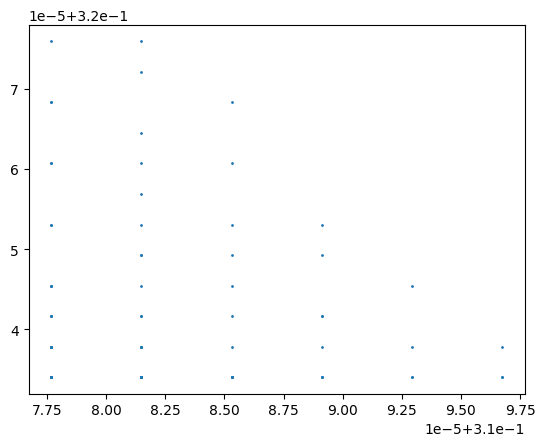

In [4]:
plot_footprint(collider_dict, octupoles=0, deactivate_HO=True, LR_to_consider=0)

Beam-beam off, octupoles on

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Compiling ContextCpu kernels...


98d5e3cc4c8c48d5a2887c38136965ae.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 98d5e3cc4c8c48d5a2887c38136965ae.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


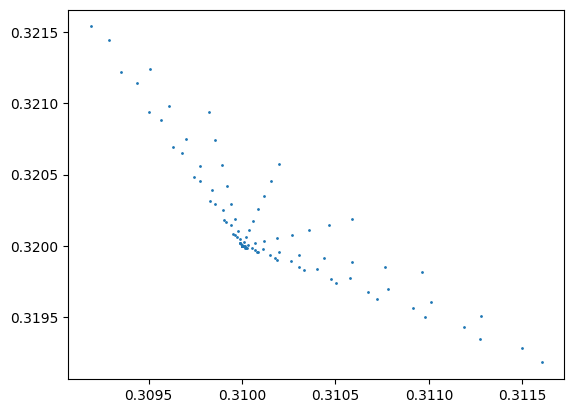

In [5]:
plot_footprint(collider_dict, octupoles=300, deactivate_HO=True, LR_to_consider=0)

Octupoles off, and only HO

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Compiling ContextCpu kernels...


ccc998de95284755b3133722fa29fd50.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from ccc998de95284755b3133722fa29fd50.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


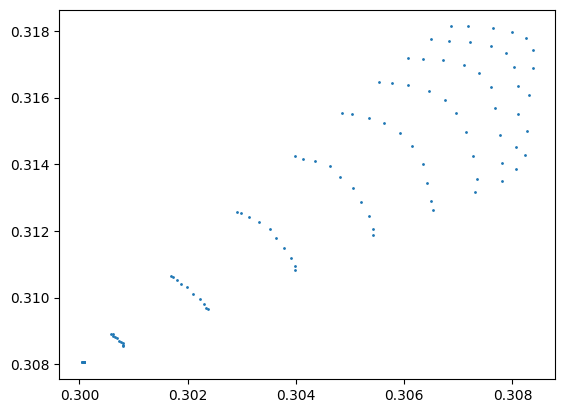

In [6]:
plot_footprint(collider_dict, octupoles=0, deactivate_HO=False, LR_to_consider=0)

Octupoles off, but HO and progressively increase number of LR

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Compiling ContextCpu kernels...


382734d705cd48fb97b8e3ce82a83710.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 382734d705cd48fb97b8e3ce82a83710.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


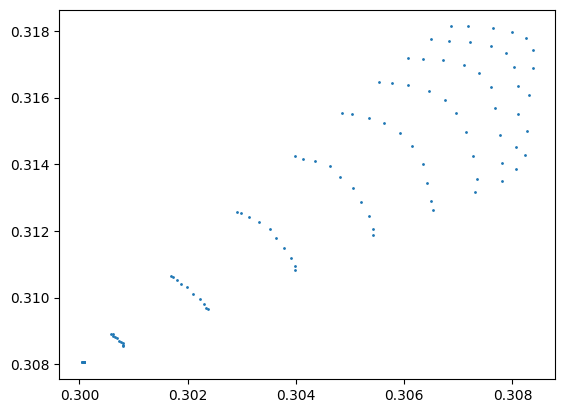

In [7]:
plot_footprint(collider_dict, octupoles=0, deactivate_HO=False, LR_to_consider=1)

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Compiling ContextCpu kernels...


37f3fbced6564d0b8c5356887d32f2ee.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 37f3fbced6564d0b8c5356887d32f2ee.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


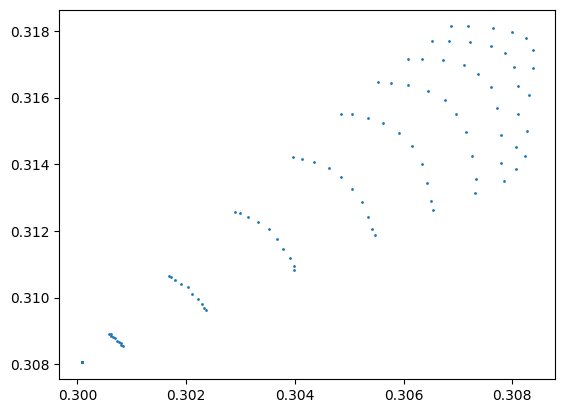

In [8]:
plot_footprint(collider_dict, octupoles=0, deactivate_HO=False, LR_to_consider=2)

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Compiling ContextCpu kernels...


aa8f66c56ee642be9bd8b6d0ab4b2926.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from aa8f66c56ee642be9bd8b6d0ab4b2926.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


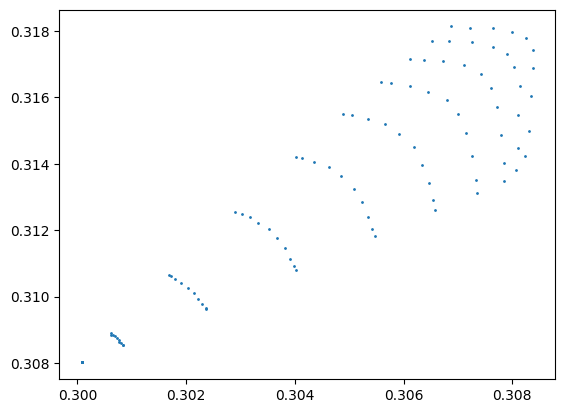

In [9]:
plot_footprint(collider_dict, octupoles=0, deactivate_HO=False, LR_to_consider=4)

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Compiling ContextCpu kernels...


8aca688130fc4ad4adb07f6fea17c4f1.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 8aca688130fc4ad4adb07f6fea17c4f1.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


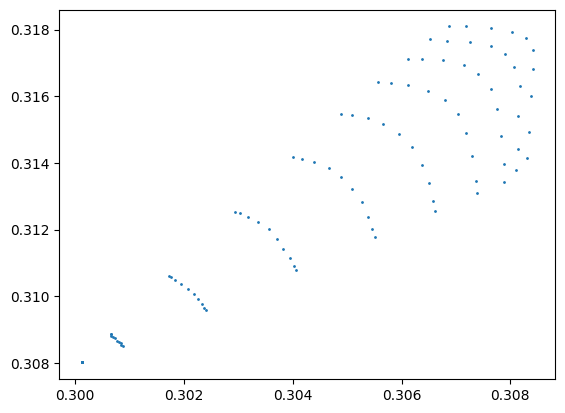

In [10]:
plot_footprint(collider_dict, octupoles=0, deactivate_HO=False, LR_to_consider=10)

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Compiling ContextCpu kernels...


4ebd12018b9245d9a12fcc4d1e59a17e.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 4ebd12018b9245d9a12fcc4d1e59a17e.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


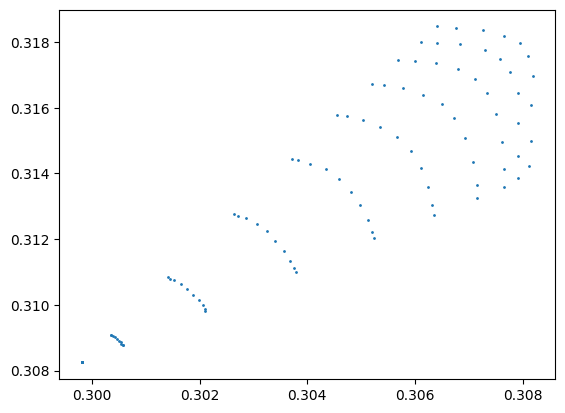

In [11]:
plot_footprint(collider_dict, octupoles=0, deactivate_HO=False, LR_to_consider=20)

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Compiling ContextCpu kernels...


612863469ac44de68bfeabfcd709f7a3.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 612863469ac44de68bfeabfcd709f7a3.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


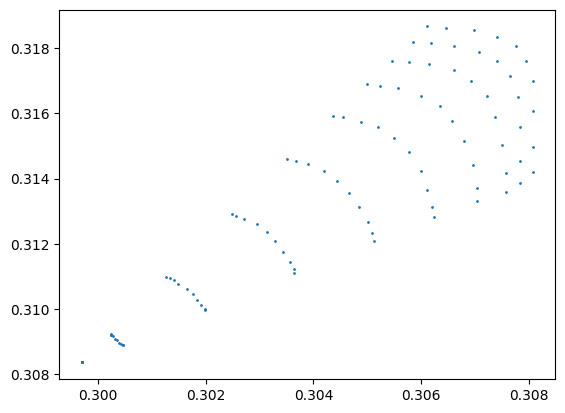

In [12]:
plot_footprint(collider_dict, octupoles=0, deactivate_HO=False, LR_to_consider=26)

All on

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Compiling ContextCpu kernels...


34f7a31a8c7a47ce966bf2d85d93b88a.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 34f7a31a8c7a47ce966bf2d85d93b88a.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


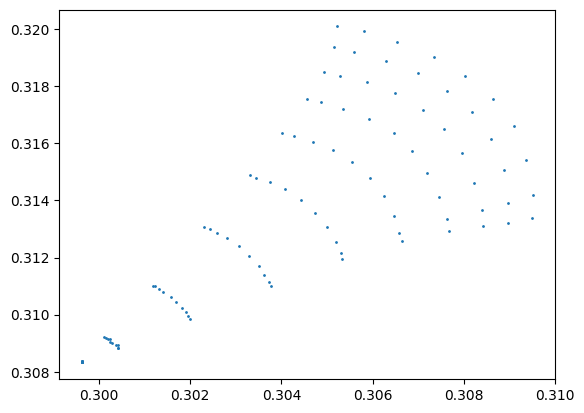

In [13]:
plot_footprint(collider_dict, octupoles=300, deactivate_HO=False, LR_to_consider=26)